## 6.1 Training Decision Tree & Visualization

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [6]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
from sklearn.tree import export_graphviz
from sklearn import tree

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

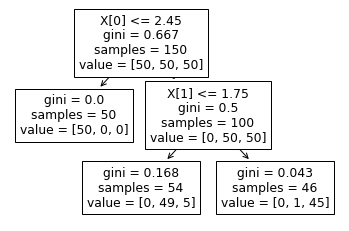

In [8]:
tree.plot_tree(tree_clf)
#Scikit-learn 최신 버전에서는 간단하게 이것으로 사용 가능

In [12]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
#Jupyter notebook을 실행한 브라우저에서 그래프를 띄울 수 있도록 하는 코드

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#그림 저장할 폴더
PROJECT_ROOT_DIR = './'

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, fig_id)

# 아래 코드는 .dot 파일을 .png로 바꾸는 코드이지만,
# 터미널에서 conda install python-graphviz로 모듈 설치 후 dot -Tpng iris_tree.dot -i iris_tree.png로도 가능
# def save_fig(fig_id, tight_layout = True):
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(image_path(fig_id) + '.png', format='png', dpi=300)

In [13]:
export_graphviz(
    tree_clf,
    out_file = image_path("iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
    )

#### Gini impurity
$$ G~i~ = 1 - \sum p~ i,k ~^2$$

## 6.3 Estimating the Class of Samples 

In [18]:
# tree_clf.predict_proba([X[0]])
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [20]:
tree_clf.predict([[5,1.5]])

array([1])

## 6.4 CART(Classification And Regression Tree) Training Algorithm

- CART Alogrithm은 Greedy algorithm으로, 최적의 솔루션을 보장하지는 않음. 최적의 트리를 찾는 것은 NP-Complete 문제.

## 6.7 Regularization Parameter

- max_depth : sklearn에서는 최대 깊이를 max_depth로 조정. 기본값은 None으로 제한이 없는 것. max_depth를 줄이면 Overfitting은 감소.

- min_samples_split : DecisionTreeClassifier에서 사용하는 것으로, 분할되기 위해 노드가 가져야 하는 최소 샘플 수를 의미

- min_samples_leaf : Leaf node가 가져야 할 최소 샘플 수

- min_weight_freaction_leaf : min_samples_leaf와 같은 역할이지만 가중치가 부여된 전체 샘플에서의 비율

- max_leaf_nodes : Leaf node의 최대 개수

- max_features : 각 노드에서 분할에 사용할 특성의 최대 수

- min_impurity_decrease : qnsgkffh djedjwlf chlthgksdml qnftnseh rkathfid

=> min_으로 시작하는 매개변수를 증가시키거나, max_로 시작하는 매개변수를 감소시키면 Model의 Regularization 효과가 커짐

## 6.8 Regression

In [48]:
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4*(X-0.5)**2
y = y + np.random.randn(m,1)/10

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

[Text(167.4, 181.2, 'X[0] <= 0.197\nmse = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(83.7, 108.72, 'X[0] <= 0.092\nmse = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(41.85, 36.23999999999998, 'mse = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.772\nmse = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(209.25, 36.23999999999998, 'mse = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(292.95, 36.23999999999998, 'mse = 0.036\nsamples = 46\nvalue = 0.615')]

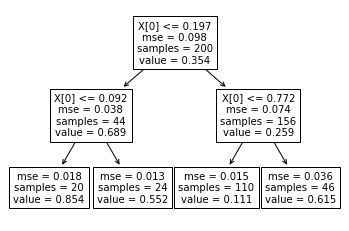

In [49]:
tree.plot_tree(tree_reg)

In [67]:
def plot_regression_predictions(tree_reg, X, y, axes = [0,1,-0.2,1], ylabel='y'):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    #-1이 의미하는 바는 열의 수에 따라 자동으로 행의 수를 지정해주는 것
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel('x1',fontsize = 18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X,y,'b.')
#     plt.plot(x1,y,'b')
    plt.plot(x1,y_pred,'r.-',linewidth=2, label=r'yhat')

In [68]:
tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg2 = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

DecisionTreeRegressor(max_depth=3)

Text(0.5, 1.0, 'max_depth=3')

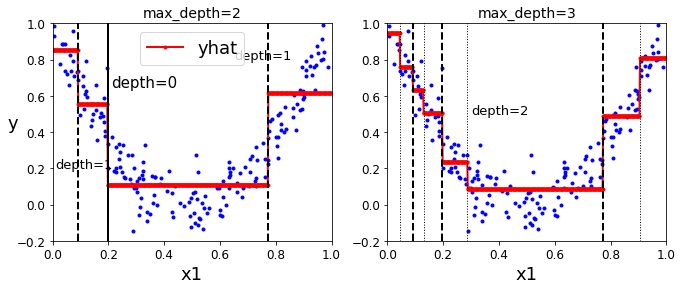

In [69]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_regression_predictions(tree_reg1,X,y)

for split, style in ((0.1973, 'k-'), (0.0917,'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.text(0.21, 0.65, 'depth=0', fontsize = 15)
plt.text(0.01, 0.2, 'depth=1', fontsize = 13)
plt.text(0.65, 0.8, 'depth=1', fontsize = 13)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=2', fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2,X,y, ylabel = None)

for split, sytle in ((0.1973, 'k-'), (0.0917,'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth = 1)

plt.text(0.3, 0.5, 'depth=2', fontsize = 13)
plt.title('max_depth=3', fontsize=14)

Text(0.5, 1.0, 'min_samples_leaf=10')

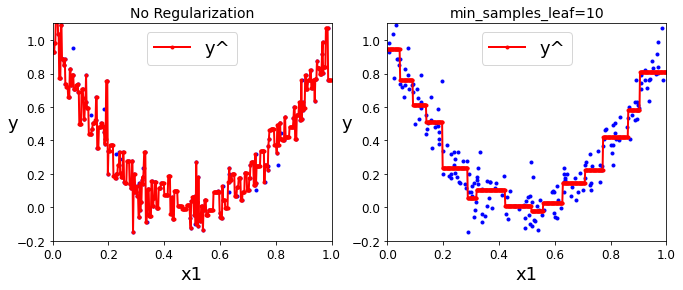

In [71]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf = 10)

tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

x1 = np.linspace(0,1,500).reshape(-1,1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(X,y,'b.')
plt.plot(x1, y_pred1, 'r.-', linewidth=2, label=r'y^')
plt.axis([0,1, -0.2,1.1])
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", fontsize =18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No Regularization", fontsize =14)

plt.subplot(122)
plt.plot(X,y,'b.')
plt.plot(x1, y_pred2, 'r.-', linewidth=2, label=r'y^')
plt.axis([0,1, -0.2,1.1])
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", fontsize =18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("min_samples_leaf=10", fontsize =14)